## **Exploratory Data Analysis Code**





In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
from collections import Counter

In [ ]:
# upload kaggle json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oliviagette","key":"32a04518a9865f3adba17b0cecb51dd4"}'}

In [ ]:
# set up kaggle API access
import zipfile

# create Kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# move kaggle.json to the right location
!mv kaggle.json /root/.kaggle/

# set proper permissions
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# download dataset from kaggle
!kaggle datasets download -d tolgadincer/labeled-chest-xray-images

Dataset URL: https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images
License(s): other
labeled-chest-xray-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

zip_path = "labeled-chest-xray-images.zip"
extract_path = "chest_xray"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to {extract_path}")

Dataset extracted to chest_xray


In [ ]:
for root, dirs, files in os.walk(extract_path):
    print(f"Folder: {root}, Number of files: {len(files)}")

Folder: chest_xray, Number of files: 0
Folder: chest_xray/chest_xray, Number of files: 0
Folder: chest_xray/chest_xray/train, Number of files: 0
Folder: chest_xray/chest_xray/train/PNEUMONIA, Number of files: 3883
Folder: chest_xray/chest_xray/train/NORMAL, Number of files: 1349
Folder: chest_xray/chest_xray/test, Number of files: 0
Folder: chest_xray/chest_xray/test/PNEUMONIA, Number of files: 390
Folder: chest_xray/chest_xray/test/NORMAL, Number of files: 234


In [ ]:
# Clean root folder (ignore __MACOSX)
dataset_root = "chest_xray/chest_xray"

# Helper function to count images per class
def count_images(folder):
    class_counts = {}
    for class_name in os.listdir(folder):
        class_dir = os.path.join(folder, class_name)
        if not os.path.isdir(class_dir) or "__MACOSX" in class_dir:
            continue
        # If it's the pneumonia folder, split by BACTERIA vs VIRAL
        if class_name.upper() == "PNEUMONIA":
            bacteria_count = 0
            viral_count = 0
            for f in os.listdir(class_dir):
                if f.lower().endswith(('.png','.jpg','.jpeg')):
                    if "bacteria" in f.lower():
                        bacteria_count += 1
                    elif "virus" in f.lower():
                        viral_count += 1
            class_counts["PNEUMONIA_BACTERIA"] = bacteria_count
            class_counts["PNEUMONIA_VIRAL"] = viral_count
            class_counts["PNEUMONIA_TOTAL"] = bacteria_count + viral_count
        else:
            n_files = len([f for f in os.listdir(class_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))])
            class_counts[class_name] = n_files
    return class_counts

# count images in train and test sets
# paths
train_path = os.path.join(dataset_root, "train")
test_path = os.path.join(dataset_root, "test")

# count images per class
print("Training set class counts:")
train_counts = count_images(train_path)
print(train_counts)

print("\nTest set class counts:")
test_counts = count_images(test_path)
print(test_counts)

Training set class counts:
{'PNEUMONIA_BACTERIA': 2538, 'PNEUMONIA_VIRAL': 1345, 'PNEUMONIA_TOTAL': 3883, 'NORMAL': 1349}

Test set class counts:
{'PNEUMONIA_BACTERIA': 242, 'PNEUMONIA_VIRAL': 148, 'PNEUMONIA_TOTAL': 390, 'NORMAL': 234}


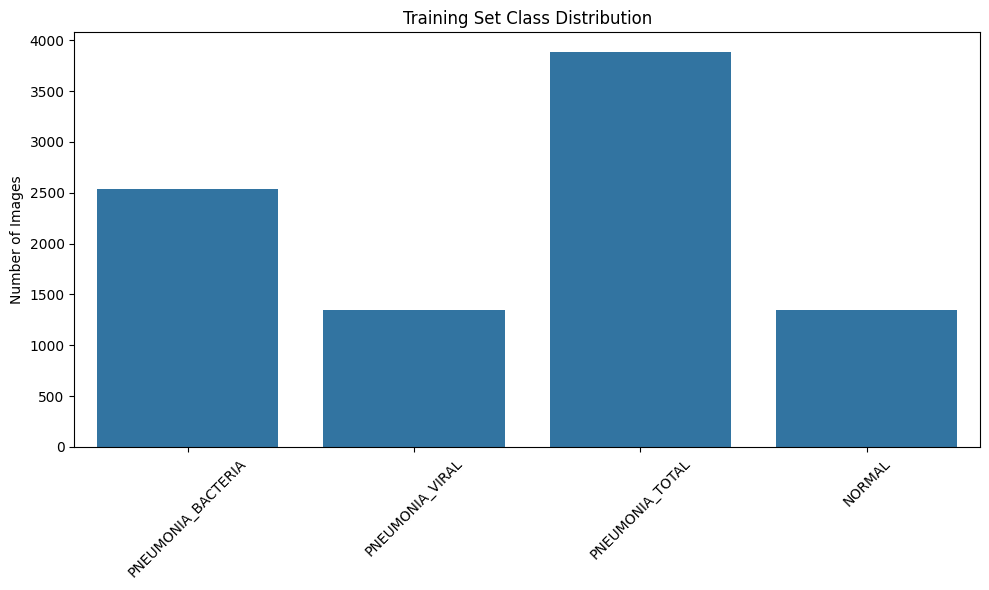

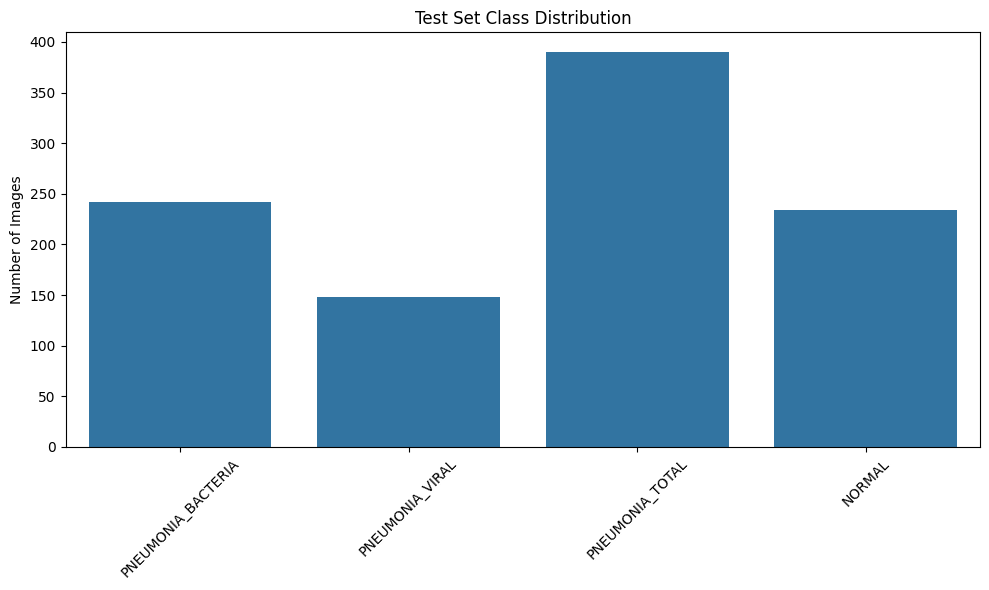

In [ ]:
# class distribution bar plots
def plot_class_distribution(counts, title):
    labels = list(counts.keys())
    values = list(counts.values())

    plt.figure(figsize=(10,6))
    sns.barplot(x=labels, y=values)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel("Number of Images")
    plt.tight_layout()
    plt.show()

plot_class_distribution(train_counts, "Training Set Class Distribution")
plot_class_distribution(test_counts, "Test Set Class Distribution")


Sample images from training set:


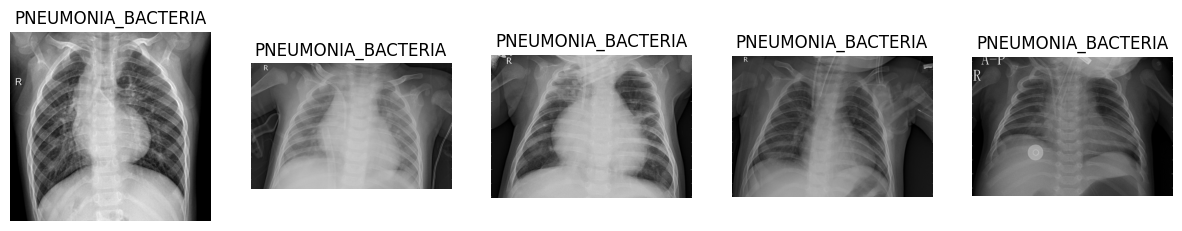

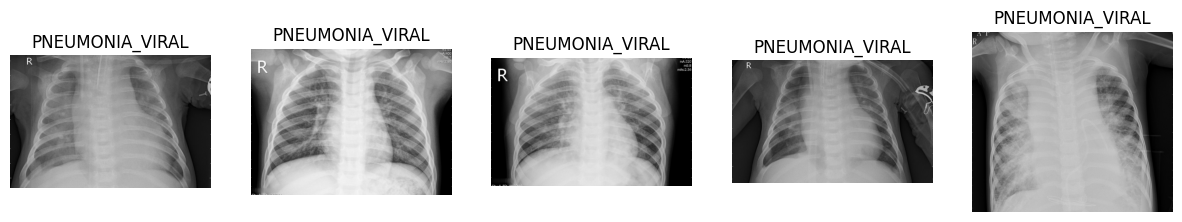

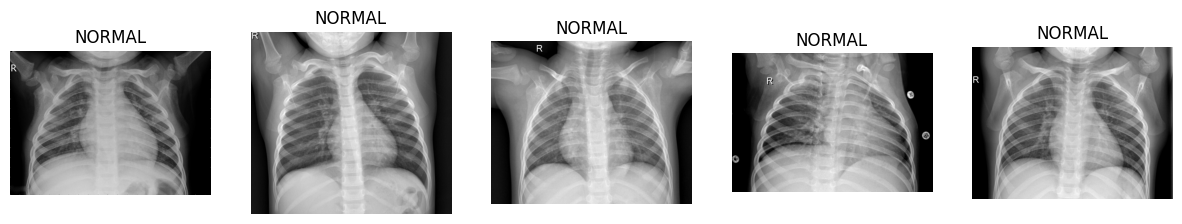


Sample images from test set:


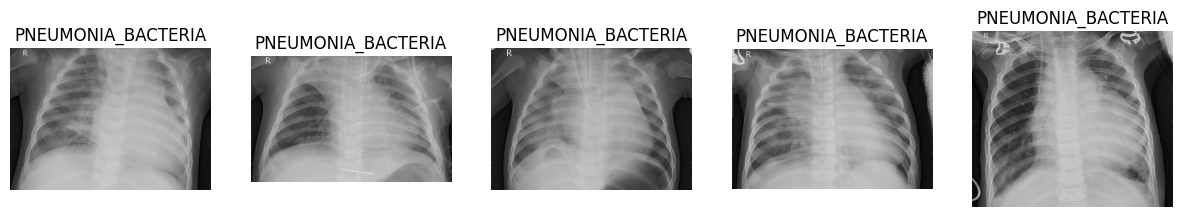

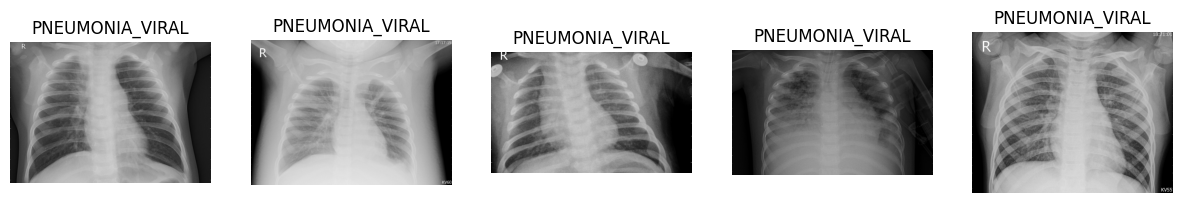

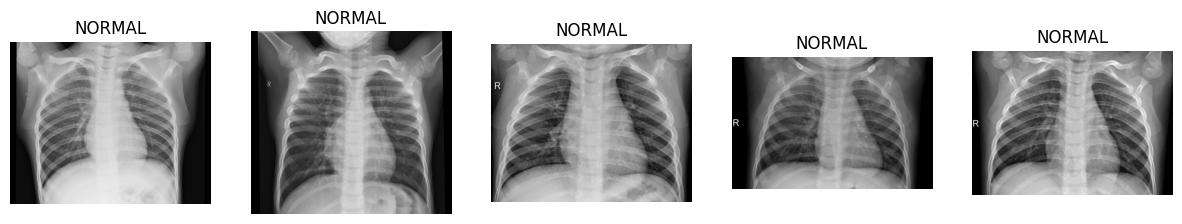

In [ ]:
# sample images from each class
def show_samples(folder, n_samples=5):
    for class_name in os.listdir(folder):
        class_dir = os.path.join(folder, class_name)
        if not os.path.isdir(class_dir) or "__MACOSX" in class_dir:
            continue
        # special handling for pneumonia
        if class_name.upper() == "PNEUMONIA":
            bacteria_imgs = [f for f in os.listdir(class_dir)
                             if f.lower().endswith(('.png','.jpg','.jpeg')) and "bacteria" in f.lower()]
            viral_imgs = [f for f in os.listdir(class_dir)
                          if f.lower().endswith(('.png','.jpg','.jpeg')) and "virus" in f.lower()]

            # show bacteria samples
            if bacteria_imgs:
                samples = random.sample(bacteria_imgs, min(n_samples, len(bacteria_imgs)))
                plt.figure(figsize=(15,3))
                for i, img_file in enumerate(samples):
                    img_path = os.path.join(class_dir, img_file)
                    img = mpimg.imread(img_path)
                    plt.subplot(1, len(samples), i+1)
                    plt.imshow(img, cmap='gray')
                    plt.title("PNEUMONIA_BACTERIA")
                    plt.axis('off')
                plt.show()

            # show viral samples
            if viral_imgs:
                samples = random.sample(viral_imgs, min(n_samples, len(viral_imgs)))
                plt.figure(figsize=(15,3))
                for i, img_file in enumerate(samples):
                    img_path = os.path.join(class_dir, img_file)
                    img = mpimg.imread(img_path)
                    plt.subplot(1, len(samples), i+1)
                    plt.imshow(img, cmap='gray')
                    plt.title("PNEUMONIA_VIRAL")
                    plt.axis('off')
                plt.show()

        else:
            # normal case
            images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))]
            samples = random.sample(images, min(n_samples, len(images)))
            plt.figure(figsize=(15,3))
            for i, img_file in enumerate(samples):
                img_path = os.path.join(class_dir, img_file)
                img = mpimg.imread(img_path)
                plt.subplot(1, len(samples), i+1)
                plt.imshow(img, cmap='gray')
                plt.title(class_name)
                plt.axis('off')
            plt.show()

print("\nSample images from training set:")
show_samples(train_path, n_samples=5)

print("\nSample images from test set:")
show_samples(test_path, n_samples=5)

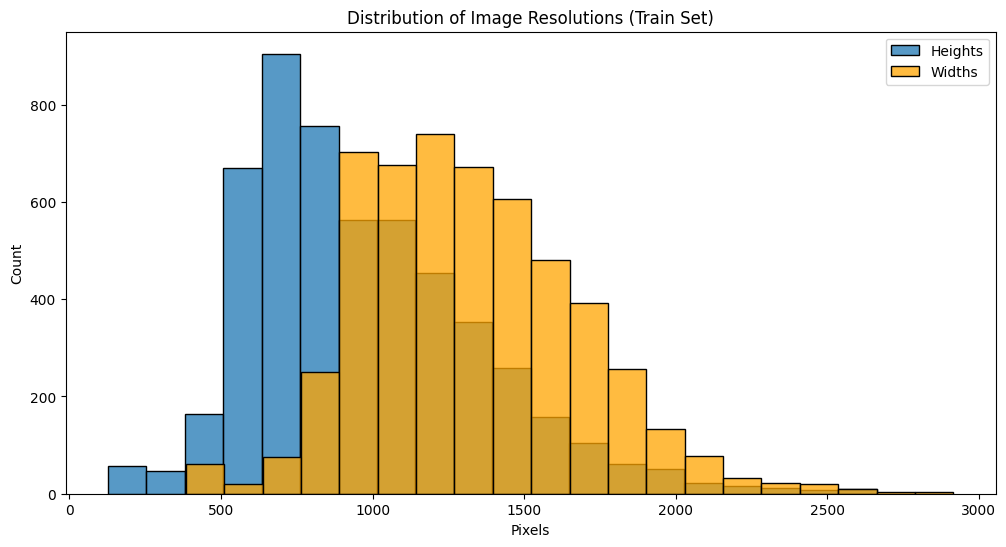

In [ ]:
# image size distribution
def get_image_sizes(folder):
    sizes = []
    for class_name in os.listdir(folder):
        class_dir = os.path.join(folder, class_name)
        if os.path.isdir(class_dir):
            for f in os.listdir(class_dir):
                if f.lower().endswith(('.png','.jpg','.jpeg')):
                    img = mpimg.imread(os.path.join(class_dir, f))
                    sizes.append(img.shape)
    return sizes

sizes = get_image_sizes(train_path)
heights = [s[0] for s in sizes]
widths = [s[1] for s in sizes]

plt.figure(figsize=(12,6))
sns.histplot(heights, bins=20)
sns.histplot(widths, bins=20, color='orange')
plt.title("Distribution of Image Resolutions (Train Set)")
plt.xlabel("Pixels")
plt.legend(["Heights","Widths"])
plt.show()

In [ ]:
def class_intensity_stats(folder):
    stats = {}
    for cls in ["NORMAL", "PNEUMONIA"]:
        vals = []
        p = os.path.join(folder, cls)
        for f in os.listdir(p):
            img = mpimg.imread(os.path.join(p, f))
            vals.append(img.mean())
        stats[cls] = {
            "mean_intensity": np.mean(vals),
            "std_intensity": np.std(vals)
        }
    return stats

print(class_intensity_stats(train_path))

{'NORMAL': {'mean_intensity': np.float64(122.38459599791005), 'std_intensity': np.float64(13.034109259867693)}, 'PNEUMONIA': {'mean_intensity': np.float64(123.20585944386974), 'std_intensity': np.float64(20.098826904591967)}}


## **Preprocessing Code**

In [ ]:
import os
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window

In [ ]:
# Configuration

HDFS_ROOT = "hdfs://master:9000/user/sat3812/cnn/raw/chest_xray"
# Output location for the processed manifest
OUTPUT_MANIFEST = "hdfs://master:9000/user/sat3812/cnn/xray_manifest_final"

# Spark Session
spark = SparkSession.builder.appName("XrayEDAAndSplit").getOrCreate()
spark.sparkContext.setLogLevel("WARN")
print("Spark Session Initialized.")


In [ ]:
# Distributed File Scan
# Load all image paths recursively from HDFS
df = (
    spark.read.format("binaryFile")
        .option("recursiveFileLookup", "true")
        .load(HDFS_ROOT)
)

print(f"Total files discovered: {df.count()}")
# Output: Total files discovered

# Extract Label and Original Split

df = df.withColumn(
    "label",
    F.regexp_extract("path", r"/(NORMAL|PNEUMONIA)/", 1)
).withColumn(
    "orig_split",
    F.regexp_extract("path", r"/(train|test)/", 1)
)
df = df.filter("label != '' AND orig_split != ''")

# Show Initial Class Distribution
print("\n--- Initial Class Distribution ---")
df.groupBy("orig_split", "label").count().orderBy("orig_split", "label").show()

# Stratified Split
train_df = df.filter("orig_split == 'train'").withColumn("label_idx", F.when(F.col("label") == "PNEUMONIA", 1).otherwise(0))
test_df  = df.filter("orig_split == 'test'").withColumn("split", F.lit("test")) \
             .withColumn("label_idx", F.when(F.col("label") == "PNEUMONIA", 1).otherwise(0))


# Split the large training data 80% train / 20% val, stratified by label
SPLIT_RATIO = 0.8
train_df = train_df.withColumn("rand", F.rand())
w = Window.partitionBy("label").orderBy("rand")
train_df = train_df.withColumn("rn", F.row_number().over(w))

# Count per label
counts = train_df.groupBy("label").agg(F.max("rn").alias("n"))
train_df = train_df.join(counts, on="label")

train_df = train_df.withColumn(
    "split",
    F.when(F.col("rn") <= F.col("n") * SPLIT_RATIO, "train")
     .otherwise("val") # The remaining 20% is validation
)

# Final Manifest Creation and EDA
# Combine the newly split train/val with the original test set
final_manifest_df = test_df.select("path", "label", "split", "label_idx") \
    .unionByName(train_df.select("path", "label", "split", "label_idx"))

print("\n--- Final Project Split Distribution ---")
final_manifest_df.groupBy("split", "label").count().orderBy("split", "label").show()

# Save Manifest to HDFS
(final_manifest_df
    .select("path", "label", "split", "label_idx")
    .write
    .mode("overwrite")
    .option("header", "true")
    .csv(OUTPUT_MANIFEST)
)

print(f"\nManifest written to: {OUTPUT_MANIFEST}")

spark.stop()

## **CNN Code**

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from PIL import Image
import numpy as np
import glob

In [ ]:
#  Configuration

# Path to Manifest (from previous step)
MANIFEST_DIR = "/home/sat3812/xray_manifest_final"
LOCAL_DATA_ROOT = "/home/sat3812/data"

BATCH_SIZE = 32 # A higher batch size processes data faster but requires more VM RAM.
NUM_EPOCHS = 10
LR = 1e-3
L2_WEIGHT_DECAY = 1e-4  # L2 Regularization (Weight Decay in Adam)
L1_LAMBDA = 1e-6  # L1 Regularization strength (must be > 0)
NUM_WORKERS = 0  # Set to 0 to avoid multiprocessing issues in Spark/Hadoop environments
IMAGE_SIZE = 128
num_classes = 2 # NORMAL and PNEUMONIA

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

In [ ]:
#  Helper Functions


def load_manifest(manifest_dir: str):
    """Load and concatenate all CSV parts from the local manifest directory."""
    # Uses glob to find all 'part-*.csv' files downloaded from HDFS
    pattern = os.path.join(manifest_dir, "part-*.csv")
    files = [f for f in glob.glob(pattern) if not os.path.basename(f).startswith("_")]
    if not files:
        raise FileNotFoundError(f"No CSV files found in {manifest_dir}")

    # Read and combine the dataframes
    dfs = [pd.read_csv(f) for f in files]
    df = pd.concat(dfs, ignore_index=True)

    # Simple check for required columns created by Spark
    required_cols = {"path", "label", "split", "label_idx"}
    missing = required_cols - set(df.columns)
    if missing:
        raise ValueError(f"Manifest missing columns: {missing}")
    return df

def hdfs_path_to_local(path: str):
    """
    Converts a Spark-generated HDFS path into a local filesystem path
    by replacing the HDFS prefix with the LOCAL_DATA_ROOT.
    """
    marker = "/chest_xray/"
    idx = path.find(marker)
    if idx == -1:
        raise ValueError(f"Could not find '{marker}' in path: {path}")

    # Extracts the relative path starting from 'chest_xray/'
    rel_path = path[idx + 1:]
    # Joins the local root with the relative path to form the final local path
    local_path = os.path.join(LOCAL_DATA_ROOT, rel_path)
    return local_path

# Reads Manifest CSV
class ManifestImageDataset(Dataset):
    def __init__(self, manifest_df: pd.DataFrame, split: str, transform=None):
        super().__init__()
        self.transform = transform

        # Filter the full manifest for the requested split ('train', 'val', or 'test')
        df_split = manifest_df[manifest_df["split"] == split].copy()
        if df_split.empty:
            raise ValueError(f"No rows found in manifest for split='{split}'")

        local_paths = []
        labels = []
        for _, row in df_split.iterrows():
            # Use the helper to convert the HDFS path stored in the manifest to a local path
            local_p = hdfs_path_to_local(row["path"])
            local_paths.append(local_p)
            labels.append(int(row["label_idx"])) # Get the numerical label index

        self.paths = local_paths
        self.labels = labels

        print(f"Loaded {len(self.paths)} samples for split='{split}'")

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img_path = self.paths[idx]
        label = self.labels[idx]

        # Load image with PIL
        with Image.open(img_path) as img:
            # Convert to Grayscale
            img = img.convert("L")

        if self.transform is not None:
            # Apply the appropriate transform
            img = self.transform(img)

        return img, label

In [ ]:
#  Data Transforms and Augmentations

# Train Transform: Includes Augmentations
train_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE + 32, IMAGE_SIZE + 32)),
    transforms.RandomCrop(IMAGE_SIZE),                      # Random crops
    transforms.RandomHorizontalFlip(p=0.5),                 # Random flip
    transforms.RandomRotation(degrees=15),                  # Small rotations
    transforms.RandomAffine(
        degrees=0,
        translate=(0.1, 0.1),                               # Random shifts
        scale=(0.9, 1.1)                                    # Random zoom
    ),
    transforms.Grayscale(num_output_channels=1),            # Convert to 1 channel
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]),            # Normalize
])

eval_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]),
])


In [ ]:
#  Model Architecture
class PneumoniaCNN(nn.Module):
    def __init__(self, num_classes: int = num_classes):
        super().__init__()
        self.features = nn.Sequential(
            # Block 1: Initial feature extraction
            nn.Conv2d(1, 16, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),

            nn.Conv2d(16, 16, kernel_size=3, padding=1, stride=1), # Conv(inch, inch) layer
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),

            nn.Conv2d(16, 32, kernel_size=3, padding=1, stride=2), # Downsample (replaces MaxPool)
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),

            nn.Conv2d(64, 64, kernel_size=3, padding=1, stride=1), # Conv(inch, inch) layer
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),

            nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=2), # Downsample
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            # Block 3
            nn.Conv2d(128, 128, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 128, kernel_size=3, padding=1, stride=1), # Conv(inch, inch) layer
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 256, kernel_size=3, padding=1, stride=2), # Downsample
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
        )
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Classifier with Dropout for regularization
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.5), # Dropout for regularization
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5), # Dropout for regularization
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.global_pool(x)
        x = self.classifier(x)
        return x

#  Regularization / Training Utils
def compute_l1_penalty(model, lambda_l1: float):
    """Calculates the L1 regularization term for all weights."""
    if lambda_l1 <= 0:
        return 0.0
    l1 = 0.0
    for p in model.parameters():
        if p.requires_grad:
            l1 = l1 + p.abs().sum()
    return lambda_l1 * l1

def train_one_epoch(model, loader, optimizer, criterion, epoch):
    model.train()
    running_loss = 0.0
    total = 0

    for inputs, targets in loader:
        inputs = inputs.to(DEVICE)
        targets = targets.to(DEVICE)

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, targets)
        loss = loss + compute_l1_penalty(model, L1_LAMBDA)# Add L1 penalty to the loss before backpropagation

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        total += targets.size(0)

    epoch_loss = running_loss / total
    epoch_acc = (total - running_loss) / total # Simplified accuracy calculation
    print(f"Epoch {epoch} | Train Loss: {epoch_loss:.4f} | Train Acc: {epoch_acc:.4f}")

@torch.no_grad()
def evaluate(model, loader, criterion, split_name="Val", class_names=None):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_targets = []

    for inputs, targets in loader:
        inputs = inputs.to(DEVICE)
        targets = targets.to(DEVICE)

        outputs = model(inputs)
        # Evaluation uses only the base loss (Cross-Entropy)
        loss = criterion(outputs, targets)

        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    print(f"{split_name} Loss: {epoch_loss:.4f} | {split_name} Acc: {epoch_acc:.4f}")

    if split_name == "Test":
        print("\n--- Test Set Metrics ---")
        cm = confusion_matrix(all_targets, all_preds)
        print("Confusion Matrix:")
        print(cm)
        print("\nClassification Report (Precision, Recall, F1-score):")
        print(classification_report(all_targets, all_preds, target_names=class_names))
        print("--------------------------")

    return epoch_loss, epoch_acc


In [ ]:
#  Main function
def main():
    # Load the Spark-processed manifest
    print(f"Loading manifest from {MANIFEST_DIR} ...")
    manifest_df = load_manifest(MANIFEST_DIR)

    class_names = sorted(manifest_df["label"].unique())
    print("Classes:", class_names)

    # Initialize Datasets and Loaders using the manifest
    train_dataset = ManifestImageDataset(manifest_df, split="train", transform=train_transform)
    val_dataset   = ManifestImageDataset(manifest_df, split="val",   transform=eval_transform)
    test_dataset  = ManifestImageDataset(manifest_df, split="test",  transform=eval_transform)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
    val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
    test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

    model = PneumoniaCNN(num_classes=len(class_names)).to(DEVICE)
    print("\n--- Model Architecture (Strided Convs, BatchNorm, Dropout) ---")
    print(model)

    criterion = nn.CrossEntropyLoss()
    # Optimizer implements L2 regularization via weight_decay
    optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=L2_WEIGHT_DECAY)

    best_val_acc = 0.0
    for epoch in range(1, NUM_EPOCHS + 1):
        train_one_epoch(model, train_loader, optimizer, criterion, epoch)
        _, val_acc = evaluate(model, val_loader, criterion, split_name="Val", class_names=class_names)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_pneumonia_cnn_manifest.pt")
            print(f"New best model saved (Val Acc = {val_acc:.4f})")

    print("\nTraining finished.")

    # Final Test Set Evaluation using the best model
    try:
        model.load_state_dict(torch.load("best_pneumonia_cnn_manifest.pt", map_location=DEVICE))
    except FileNotFoundError:
        print("Warning: best model file not found, using last epoch model.")
    evaluate(model, test_loader, criterion, split_name="Test", class_names=class_names)

if __name__ == "__main__":
    main()

## **Evaluation Code**

In [ ]:
import torch
import os
import pandas as pd
from torchvision import transforms
from sklearn.metrics import confusion_matrix, classification_report
from torch.utils.data import DataLoader
from cnn_final import (PneumoniaCNN, load_manifest, ManifestImageDataset,
                      eval_transform, evaluate, DEVICE)

# Configuration
MANIFEST_DIR = "/home/sat3812/xray_manifest_final"

# Evaluation Function
def final_evaluation():
    # Load Data
    manifest_df = load_manifest(MANIFEST_DIR)
    class_names = sorted(manifest_df["label"].unique())
    test_dataset = ManifestImageDataset(manifest_df, split="test", transform=eval_transform)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)

    # Load Model Architecture
    model = PneumoniaCNN(num_classes=len(class_names)).to(DEVICE)

    # Load Best Weights and Evaluate
    print("\n--- Running Final Test Evaluation ---")
    try:
        # Loads best model
        model.load_state_dict(torch.load("best_pneumonia_cnn_manifest.pt", map_location=DEVICE))

        criterion = torch.nn.CrossEntropyLoss()

        # Runs the evaluation on the test set and prints the final metrics
        evaluate(model, test_loader, criterion, split_name="Test", class_names=class_names)

    except Exception as e:
        print(f"ERROR: Failed to load saved model: {e}")
        print("Please ensure the best model file exists and is not corrupt.")

if __name__ == "__main__":
    final_evaluation()